# Capstone Project 1

In [121]:
# Import required package
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score


In [79]:
#Read the data from csv file and convert them into pandas dataframe
df = pd.read_csv(r'C:\Users\mk185318\Desktop\DataScience files\Capstone project\housesalesprediction\kc_house_data.csv')

In [80]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


**DATA CLEANING AND PREPROCESSING**

Let’s analyze the dataset and take a closer look at its content. The aim here is to find details like the number of columns and other metadata which will help us to gauge size and other properties such as the range of values in the columns of the dataset

In [81]:
#to get information about the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [82]:
#to get more information about the numerical data in our dataset
# get min, max, mean, std, quartiles for all the numerical columns/features
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [83]:
# The maximum price of a house using max function. It is also be find using pandas describe method.
max(df.price)

7700000.0

In [84]:
# The minimum price of a house 
min(df.price)

75000.0

In [85]:
# The average price of a house
df.price.mean()

540088.1417665294

In [86]:
# The median price of house
df.price.median()

450000.0

**To check if there are any null values in the dataset**

In [87]:
# Looking for nulls
print(df.isnull().any())


id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool


In [88]:
# Inspecting type
print(df.dtypes)


id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


The data is pretty clean. There are no pesky nulls which we need to treat and most of the features are in numeric format. Let's go ahead and drop the "id" and "date" columns as these 2 features will not be used in this analysis.

**MISSING DATA**

The answer to these questions is important for practical reasons because missing data can imply a reduction of the sample size. This can prevent us from proceeding with the analysis. Moreover, from a substantive perspective, we need to ensure that the missing data process is not biased and hiding an inconvenient truth. The good news is our data set contains no missing values

# Outlier Detection : 
Outliers were detected and using the outlier boxplots. From From the outlier boxplot we infered that the data consits of many outliers for the target variable,Price. However, the outlier for price variable corresponded to outlier
to outliers for Number of Bedrooms , number of Bathrooms and Square Feet Living.  On further investingation ,we inferred that these outliers correspond to High value of Grade,Condition, and View. Hence ,we concluded that these outliers are legitimate
Outliers and we decided to retain them in the data.

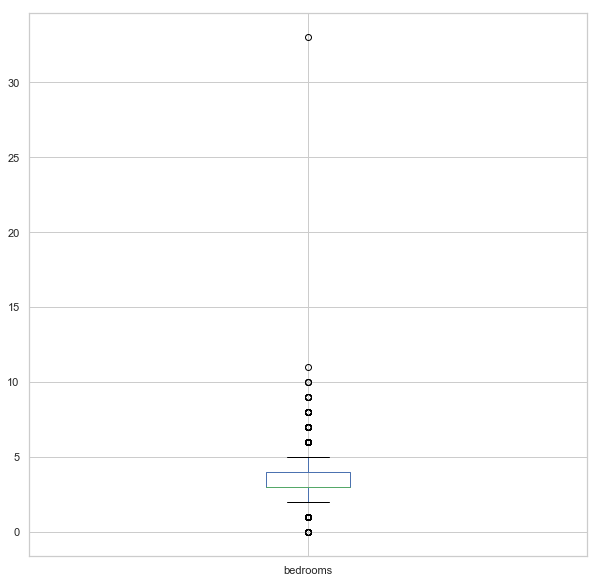

In [89]:
# Using the boxplot we can see if there are any outliers.
df.boxplot('bedrooms', figsize= (10,10))

In [90]:
# find the most expensive houses and see what are their features
# Make sure they are not mistake or bad input data
df[['id','price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','condition','grade','sqft_basement']].sort_values('price',ascending=False).head(10)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement
7252,6762700020,7700000.0,6,8.00,12050,27600,2.5,0,4,13,3480
3914,9808700762,7062500.0,5,4.50,10040,37325,2.0,1,3,11,2360
9254,9208900037,6885000.0,6,7.75,9890,31374,2.0,0,3,13,1030
4411,2470100110,5570000.0,5,5.75,9200,35069,2.0,0,3,13,3000
1448,8907500070,5350000.0,5,5.00,8000,23985,2.0,0,3,12,1280
1315,7558700030,5300000.0,6,6.00,7390,24829,2.0,1,4,12,2390
1164,1247600105,5110800.0,5,5.25,8010,45517,2.0,1,3,12,2020
8092,1924059029,4668000.0,5,6.75,9640,13068,1.0,1,3,12,4820
2626,7738500731,4500000.0,5,5.50,6640,40014,2.0,1,3,12,290
8638,3835500195,4489000.0,4,3.00,6430,27517,2.0,0,3,12,0


In [91]:
df[(df.bedrooms>7)][['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','grade']].sort_values('bedrooms',ascending=False).head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade
15870,640000.0,33,1.75,1620,6000,1.0,7
8757,520000.0,11,3.00,3000,4960,2.0,7
15161,650000.0,10,2.00,3610,11914,2.0,7
19254,660000.0,10,3.00,2920,3745,2.0,7
13314,1148000.0,10,5.25,4590,10920,1.0,9


In [92]:
# Convert date column from string to datetime
df['date'] = pd.to_datetime(df.date)

In [93]:
# sort the dataframe by date 
df.sort_values('date')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
16768,5561000190,2014-05-02,437500.0,3,2.25,1970,35100,2.0,0,0,...,9,1970,0,1977,0,98027,47.4635,-121.991,2340,35100
9596,472000620,2014-05-02,790000.0,3,2.50,2600,4750,1.0,0,0,...,9,1700,900,1951,0,98117,47.6833,-122.400,2380,4750
9587,1024069009,2014-05-02,675000.0,5,2.50,2820,67518,2.0,0,0,...,8,2820,0,1979,0,98029,47.5794,-122.025,2820,48351
20602,7853361370,2014-05-02,555000.0,4,2.50,3310,6500,2.0,0,0,...,8,3310,0,2012,0,98065,47.5150,-121.870,2380,5000
11577,5056500260,2014-05-02,440000.0,4,2.25,2160,8119,1.0,0,0,...,8,1080,1080,1966,0,98006,47.5443,-122.177,1850,9000
20559,3438501320,2014-05-02,295000.0,2,2.50,1630,1368,2.0,0,0,...,7,1280,350,2009,0,98106,47.5489,-122.363,1590,2306
18690,1737320120,2014-05-02,470000.0,5,2.50,2210,9655,1.0,0,0,...,8,1460,750,1976,0,98011,47.7698,-122.222,2080,8633
1041,7197300105,2014-05-02,550000.0,4,2.50,1940,10500,1.0,0,0,...,7,1140,800,1976,0,98052,47.6830,-122.114,2200,10500
172,1999700045,2014-05-02,313000.0,3,1.50,1340,7912,1.5,0,0,...,7,1340,0,1955,0,98133,47.7658,-122.339,1480,7940
7734,1962200037,2014-05-02,626000.0,3,2.25,1750,1572,2.5,0,0,...,9,1470,280,2005,0,98102,47.6498,-122.321,2410,3050


In [94]:
# to check how many houses were sold on 2014
df[df.date<'2015-1-1'].price.count()

14633

In [95]:
# to check how many houses were sold on 2015
df[df.date>='2015-1-1'].price.count()

6980

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


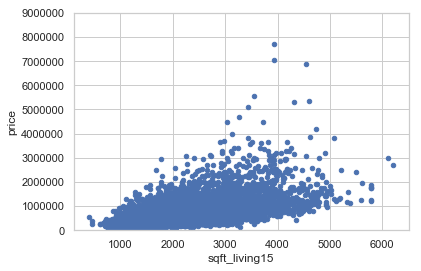

In [96]:
var = 'sqft_living15'
data = pd.concat([df['price'], df[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(3,9000000));

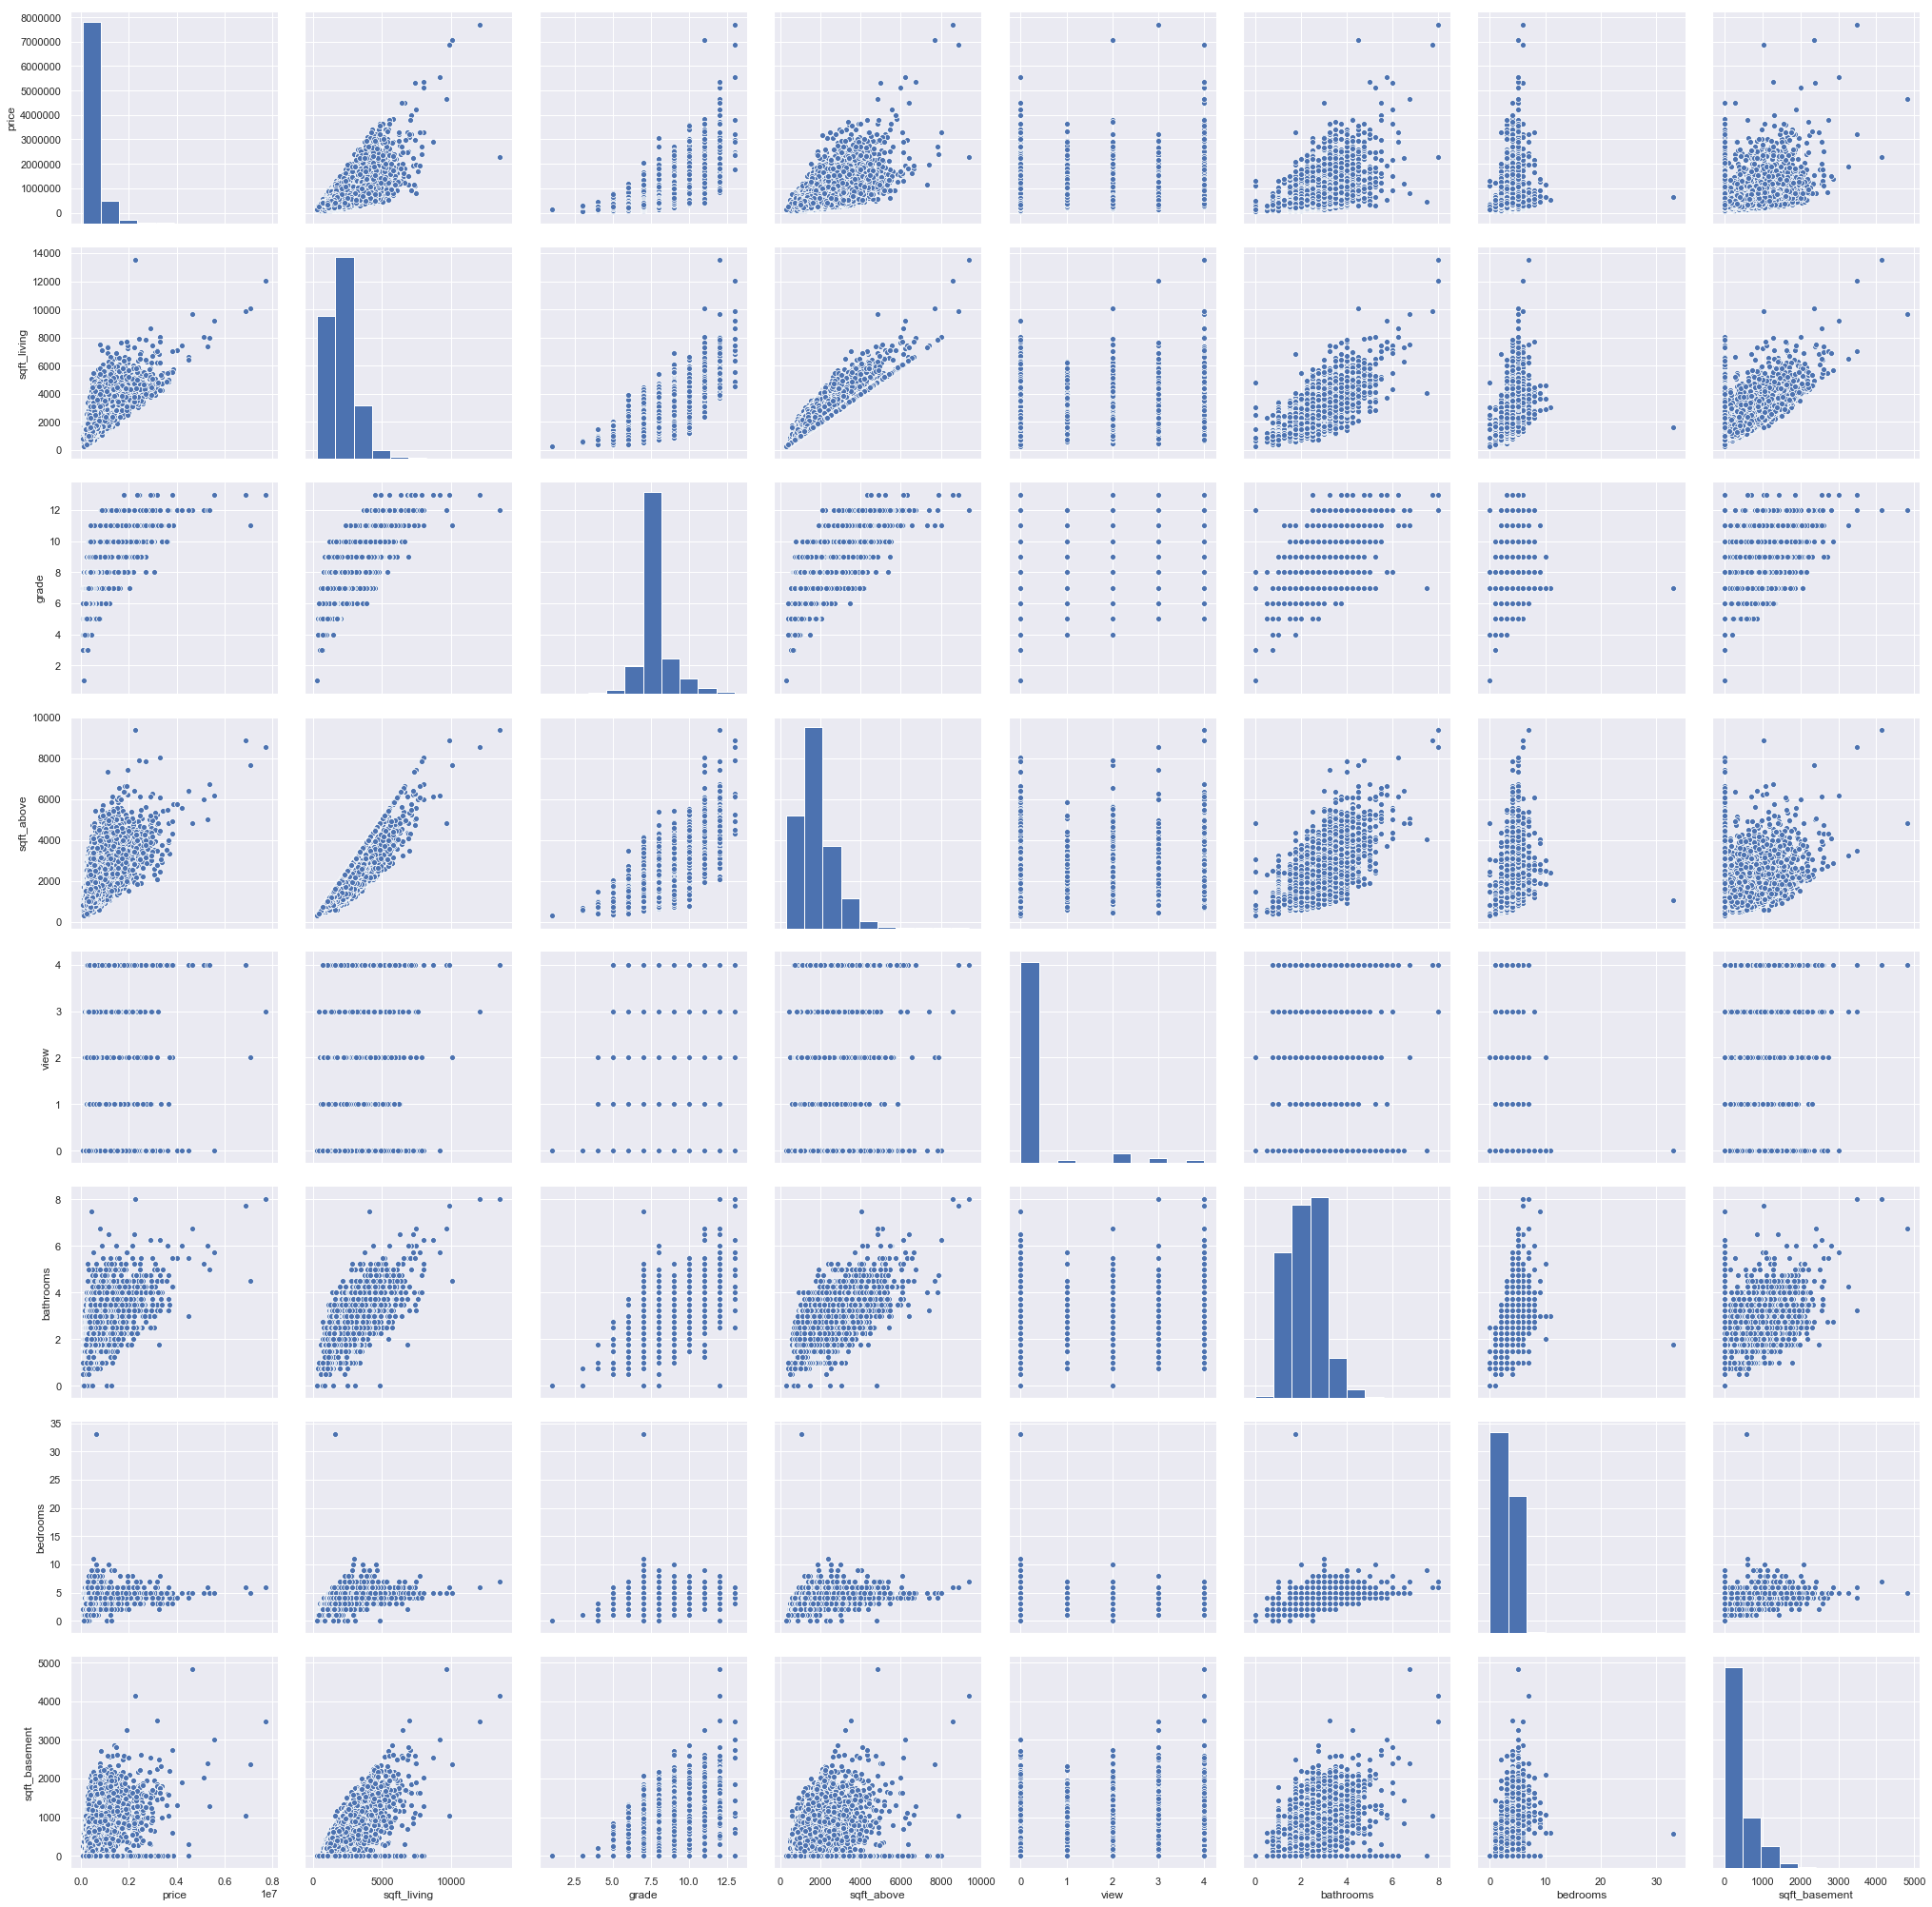

In [97]:
#Pairplots to visualize strong correlation
sns.set()
cols = ['price', 'sqft_living', 'grade', 'sqft_above', 'view', 'bathrooms','bedrooms','sqft_basement']
sns.pairplot(df[cols], height = 3.5)
plt.show();

To determine bedrooms, floors or bathrooms/bedrooms vs price, I preferred boxplot because we have numerical data but they are not continuous as 1,2,... bedrooms, 2.5, 3,... floors (probably 0.5 stands for the penthouse).

From the below charts, it can be seen that there are very few houses which have some features or price appears far from others like 33 bedrooms or price around 7000000. However, determining their possible negative effect will be time consuming and in the real data sets there will always be some outliers like some luxury house prices in this dataset. That's why I am not planning to remove outliers.

In [98]:
sns.set(style="whitegrid", font_scale=1)

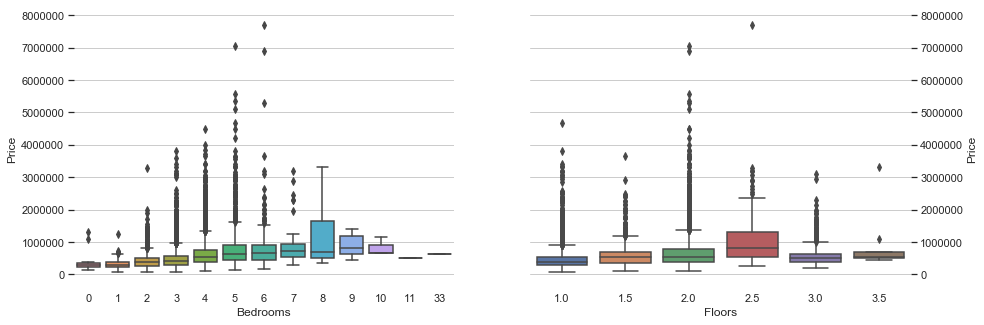

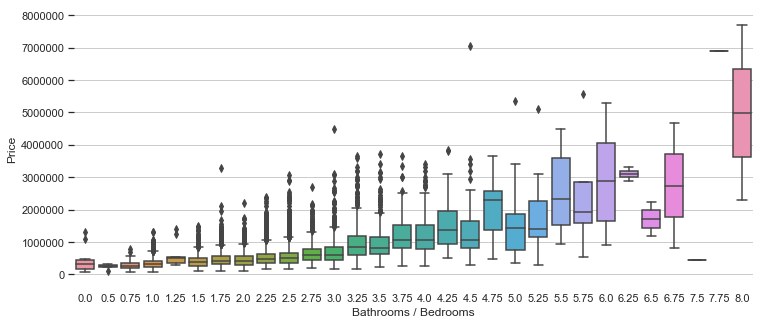

In [99]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=df['bedrooms'],y=df['price'], ax=axes[0])
sns.boxplot(x=df['floors'],y=df['price'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Bedrooms', ylabel='Price')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='Floors', ylabel='Price')

f, axe = plt.subplots(1, 1,figsize=(12.18,5))
sns.despine(left=True, bottom=True)
sns.boxplot(x=df['bathrooms'],y=df['price'], ax=axe)
axe.yaxis.tick_left()
axe.set(xlabel='Bathrooms / Bedrooms', ylabel='Price');

Let's visualize more features. When we look at the below boxplots, grade and waterfront effect price visibly. On the other hand, view seem to effect less but it also has an effect on price.

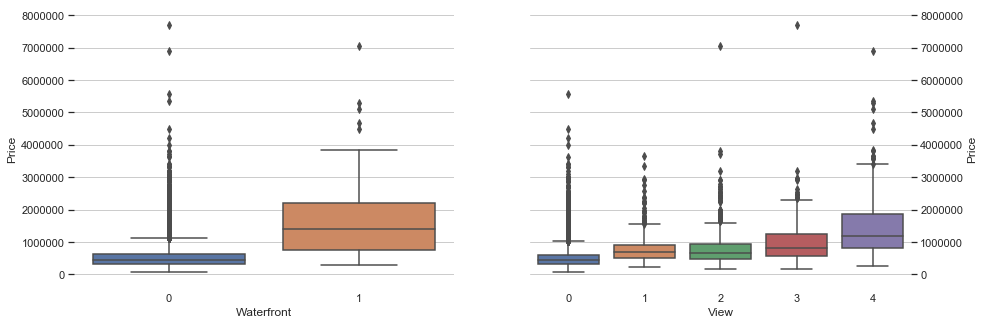

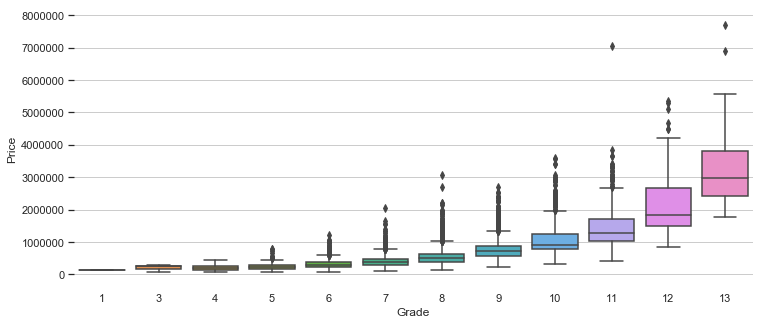

In [100]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=df['waterfront'],y=df['price'], ax=axes[0])
sns.boxplot(x=df['view'],y=df['price'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Waterfront', ylabel='Price')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='View', ylabel='Price')

f, axe = plt.subplots(1, 1,figsize=(12.18,5))
sns.boxplot(x=df['grade'],y=df['price'], ax=axe)
sns.despine(left=True, bottom=True)
axe.yaxis.tick_left()
axe.set(xlabel='Grade', ylabel='Price');


**FINDING CORRELATION**

In this step we check by finding correlation of all the features with respect to target variable i.e., price to see whether they are positively correlated or negatively correlated to find if they help in prediction process in model building process or not. But this is also one of the most important step as it also involves domain knowledge of the field of the data means you cannot simply remove the feature from your prediction process just because it is negatively correlated because it may contribute in future prediction for this you should take help of some domain knowledge personnel
As id and date columns are not important to predict price so we are discarding it for finding correlation

In [101]:
df_train = df.copy()
df_train.rename(columns = {'price':'SalePrice'}, inplace = True)

In [102]:
new_data = df_train[['sqft_living','grade', 'sqft_above', 'sqft_living15','bathrooms','view','sqft_basement','waterfront','yr_built','lat','bedrooms','long']]

In [110]:
features = df.iloc[:,3:].columns.tolist()
target = df.iloc[:,2].name

In [104]:
correlations = {}
for f in features:
    data_temp = df[[f,target]]
    x1 = data_temp[f].values
    x2 = data_temp[target].values
    key = f + ' vs ' + target
    correlations[key] = pearsonr(x1,x2)[0]

In [111]:
data_correlations = pd.DataFrame(correlations, index=['Value']).T
data_correlations.loc[data_correlations['Value'].abs().sort_values(ascending=False).index]

,Value
sqft_living vs price,0.702035
grade vs price,0.667434
sqft_above vs price,0.605567
sqft_living15 vs price,0.585379
bathrooms vs price,0.525138
view vs price,0.397293
sqft_basement vs price,0.323816
bedrooms vs price,0.308350
lat vs price,0.307003
waterfront vs price,0.266369


As zipcode is negatively correlated with sales price, so we can discard it for sales price prediction

**SPLITTING DATA INTO TRAINING AND TESTING SET**

The training dataset and test dataset must be similar, usually have the same predictors or variables. They differ on the observations and specific values in the variables. If you fit the model on the training dataset, then you implicitly minimize error or find correct responses. The fitted model provides a good prediction on the training dataset. Then you test the model on the test dataset. If the model predicts good also on the test dataset, you have more confidence. You have more confidence since the test dataset is similar to the training dataset, but not the same nor seen by the model. It means the model transfers prediction or learning in real sense.
So, by splitting dataset into training and testing subset, I can efficiently measure my trained model since it never sees testing data before. Thus it's possible to prevent overfitting.
I am just splitting dataset into 20% of test data and remaining 80% will used for training the model.


In [112]:
X = new_data.values
y = df_train.SalePrice.values

In [113]:
X_train, X_test, y_train, y_test =train_test_split(X, y ,test_size=0.2)

In [115]:
from sklearn.linear_model  import LinearRegression
linear=LinearRegression()
linear.fit(X_train, y_train)
lin=linear.score(X_test,y_test)
linpredict = linear.predict(X_test)
exp_lin = explained_variance_score(linpredict,y_test)

In [116]:
from sklearn.ensemble import RandomForestRegressor
rand_regr = RandomForestRegressor(n_estimators=400,random_state=0)
rand_regr.fit(X_train, y_train)
random=rand_regr.score(X_test,y_test)
predictions = rand_regr.predict(X_test)
exp_rand = explained_variance_score(predictions,y_test)

In [117]:
from sklearn.ensemble import GradientBoostingRegressor
est=GradientBoostingRegressor(n_estimators=400, max_depth=5, loss='ls',min_samples_split=2,learning_rate=0.1).fit(X_train, y_train)
gradient=est.score(X_test,y_test)
pred = est.predict(X_test)
exp_est = explained_variance_score(pred,y_test)

In [118]:
from sklearn.tree  import DecisionTreeRegressor
decision=DecisionTreeRegressor()
decision.fit(X_train, y_train)
decc=decision.score(X_test,y_test)
decpredict = decision.predict(X_test)
exp_dec = explained_variance_score(decpredict,y_test)

In [120]:
# Comparing Models on the basis of Model's Accuracy Score and Explained Variance Score of different models
models_cross = pd.DataFrame({
    'Model': ['Gradient Boosting','Linear Regression','Random Forest','Decision Tree'],
    'Score': [gradient,lin,random,decc],
     'Variance Score': [exp_est,exp_lin,exp_rand,exp_dec]})
    
models_cross.sort_values(by='Score', ascending=False)

,Model,Score,Variance Score
0,Gradient Boosting,0.901127,0.886858
2,Random Forest,0.875273,0.847841
3,Decision Tree,0.771073,0.768462
1,Linear Regression,0.696697,0.534157


**CONCLUTION**

So, I have seen that accuracy of gradient boosting is around 88.84% and also achieved decent variance score of 0.87 which is very close to 1. And all the metrics suggests that Gradient Boosting model has better performance. Therefore, it is inferred that Gradient Boosting is the suitable model 
